Na aula anterior, começamos a entender como funciona o cálculo de distâncias entre pontos de um GeoDataSet. Nesse processo, identificamos que as estações de metrô só atendem a uma pequena parte do território do município do Rio de Janeiro, e que, portanto, é interessante agregarmos também à nossa análise outros meios de transporte público que compreendam outras áreas desse território - visto que determinados imóveis podem estar tão distantes do metrô que esse fator acaba deixando de fazer efeito significativo sobre seus valores.

Portanto, nessa etapa, vamos agrupar dados do metrô, dos trens e do BRT (um tipo de ônibus que possui uma via própria, como se andasse sobre trilhos), concatenando-os em um único arquivo para criarmos uma variável Transporte. Feito isso, calcularemos as distâncias a partir dessa nova variável.

Começaremos esse processo criando um novo notebook Python entitulado "02.Agregando Outros Tipos de Transporte". Nele, faremos as configurações inicias:

In [1]:
%matplotlib inline
import geopandas as gpd
import pandas as pd

Em seguida, importaremos os dados das estações de metrô e alteraremos o CRS desse conjunto:

In [2]:
metro = gpd.read_file('Transporte/Metrô/Estações_Metrô.geojson')
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [3]:
metro.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (667.827 7476.959)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (668.471 7475.883)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (669.365 7474.959)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.012 7474.182)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.963 7472.930)


Também importaremos os datasets rj e geo_dados:

In [5]:
rj = gpd.read_file('Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados = gpd.read_file('Mapas/RJ-DATASET/DATASET.shp')

Os outros conjuntos de dados com que trabalharemos também deverão ser extraídos do site Data.Rio, e podem ser encontrados pesquisados pelos termos relacionados ("BRT" e "trem", respectivamente). Para faciliarmos esse trabalho, separamos os links diretos para esses arquivos a seguir:

* dataset "Estações_BRT"
* dataset "Estações_Trem"

Esses arquivos devem ser colocados em suas respectivas pastas (dentro da pasta "Transporte" dos diretórios do nosso projeto). Importaremos, então, nosso dataset Estações_Trem, e mudaremos o seu CRS para adequá-lo ao nosso tratamento:

In [6]:
trem = gpd.read_file('Transporte/Trem/Estações_Trem.geojson')
trem = trem.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [7]:
trem.head()

,OBJECTID,Cod,Nome,Flg_IntegraOnibus,Flg_IntegraMetro,Flg_Terminal,Flg_TransfRamal,Flg_TransfCentral,Flg_IntegraTele,Flg_Mun,...,Flg_Deodoro,Flg_SantaCruz,Flg_Japeri,Flg_Paracambi,Flg_VilaInhomirim,Flg_Guapimirim,Data_Inc,Integra_BRT,Corredor_BRT,geometry
0,1,60,Nova Iguaçu,NaN,NaN,1.0,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (659.201 7482.133)
1,2,20,Comendador Soares,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (655.158 7484.011)
2,3,4,Austin,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (651.716 7486.686)
3,4,81,Queimados,NaN,NaN,1.0,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (648.291 7487.170)
4,5,29,Engenheiro Pedreira,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (643.199 7491.371)


Então, plotaremos os pontos desse conjunto sobre o nosso mapa:

<AxesSubplot:>

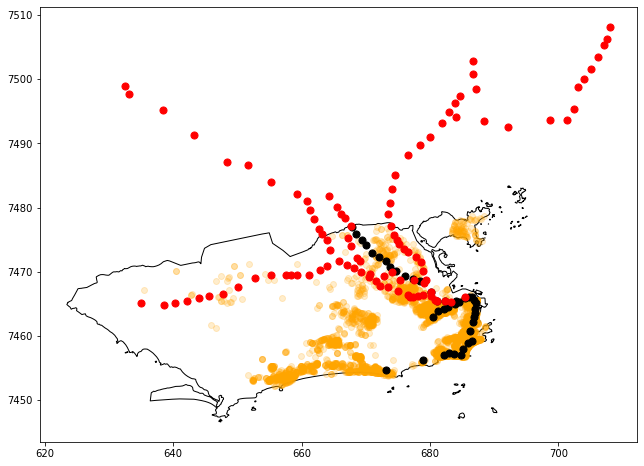

In [8]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))

geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 50)
trem.plot(ax=base, color='red', markersize= 50)

Dessa forma, teremos acima o mapa da cidade do Rio de Janeiro com pontos laranjas representando os imóveis, pontos pretos representando as estações de metrô e pontos vermelhos representando as estações de trem. Porém, repare que existem pontos que se encontram fora da área do município com o qual estamos trabalhando, já que o sistema de trens atende também a região metropolitana do estado.

Resolveremos isso sobrescrevendo a variável trem com a função within(), passando a geometria da variável rj, da mesma forma que aprendemos anteriormente:

In [9]:
trem = trem[trem.within(rj.iloc[0].geometry)]

<AxesSubplot:>

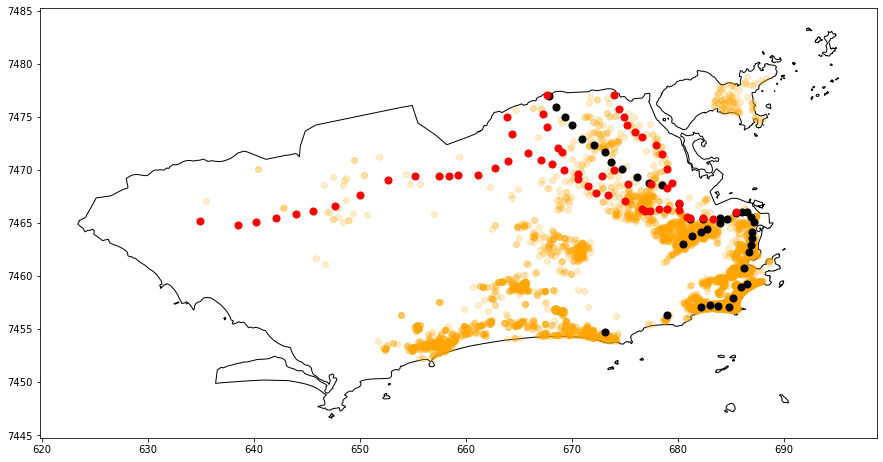

In [11]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))

geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 50)
trem.plot(ax=base, color='red', markersize= 50)

# Estações BRT

Até o momento, nós importamos os dados de Estações_Trem e fizemos a seleção dos pontos que estão no município do Rio de Janeiro. Dando continuidade, vamos importar as estações dos ônibus BRT, alterando o CRS desse conjunto para adequá-lo às nossas configurações:

In [12]:
brt = gpd.read_file('Transporte/BRT/Estações_BRT.geojson')
brt = brt.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

Em seguida, plotaremos a variável brt sobre o mapa do município, juntamente com o restante dos nossos dados:

<AxesSubplot:>

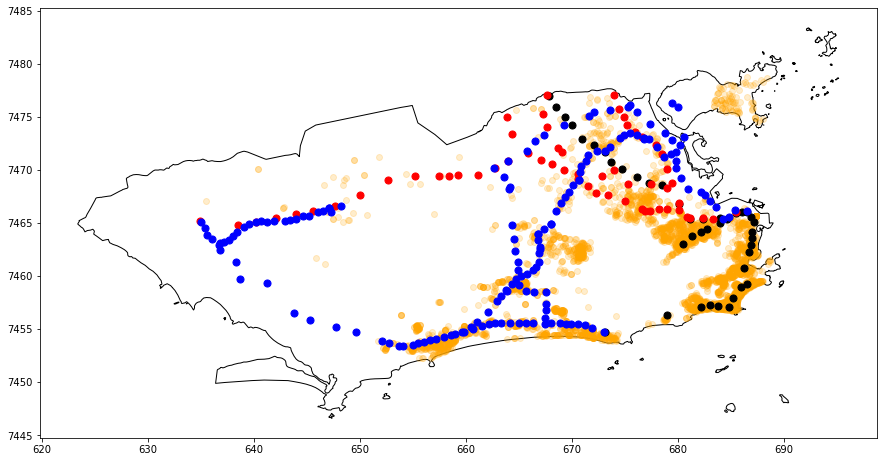

In [13]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 50)
trem.plot(ax=base, color='red', markersize= 50)
brt.plot(ax=base, color='blue', markersize= 50)

Com todas essas informações, já conseguimos abranger melhor a área da cidade do Rio de Janeiro:

Antes de calcularmos as distâncias, precisamos agrupar esses dados em um único GeoDataFrame. Como estamos interessados somente na geometria ("geometry") desses conjuntos, criaremos geoseries a partir delas para então concatená-las.

Para isso, atribuiremos a uma variável transporte o retorno da função pd.concat() (que só poderá ser executada caso o Pandas tenha sido corretamente importado). A essa função, passaremos, entre colchetes, trem.geometry, metro.geometry e brt.geometry. Além disso, utilizaremos o parâmetro ignore_idex = True para evitar que a nova GeoSeries mantenha os índices dos conjuntos concatenados.

In [14]:
transporte = pd.concat([trem.geometry, metro.geometry, brt.geometry], ignore_index = True)

In [15]:
transporte.head()

0    POINT (676.866 7466.079)
1    POINT (663.964 7470.815)
2    POINT (662.792 7470.218)
3    POINT (661.119 7469.485)
4    POINT (659.274 7469.469)
dtype: geometry

A geoseries resultante possui 262 pontos sem uma ordem específica, já que, no momento, somente nos importaremos com as distâncias entre os imóveis anunciados e a estação mais próxima dentre esses diferentes meios de transporte. Poderíamos, em outro caso, ter criado um GeoDataFrame que incluísse também a informação do tipo de transporte representado em cada ponto.

Agora, criaremos uma nova variável/coluna Dist_Transporte no nosso conjunto geo_dados. Assim como Dist_Metro, ela receberá as distâncias entre cada imóvel e a estação mais próxima do nosso conjunto transporte - uma construção que já aprendemos nas etapas anteriores:

In [16]:
geo_dados['Dist_Transporte'] = geo_dados['geometry'].apply(lambda x: transporte.distance(x).min())

In [17]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_Transporte
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),0.443193
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),3.642787
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.641470
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),0.422370
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),0.214605


Ou seja, conseguimos efetivamente colocar a nova variável Dist_Transporte no nosso conjunto. Não devemos nos esquecer de salvar essas alterações com geo_dados.to_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp').

Se quisermos, podemos executar também o coeficiente de correlação desses dados:

In [18]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Transporte
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.042684
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,0.358735
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.031812
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,-0.014628
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.006363
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.070240
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.103653
Dist_Transporte,-0.042684,0.358735,-0.031812,-0.014628,0.006363,0.070240,-0.103653,1.000000


Perceba que o coeficiente de correlação entre Dist_Transporte e Valor é de -0.103653 - ou seja, a relação entre distância e valor (**quanto mais distante de uma estação, menor o valor do imóvel**) é mantida, apesar de ser um pouco menor.

Em um próximo curso, testaremos a significância dessas correlações. Na próxima etapa, a partir de outra fonte de dados, vamos calcular a menor distância entre os imóveis anunciados e a orla da cidade - ou seja, a praia.

Nós já criamos um GeoDataSet com os dados referentes aos transportes na cidade do Rio de Janeiro e calculamos a distância dos imóveis anunciados até as estações mais próximas de cada um.

Nosso objetivo agora é calcular distâncias de um ponto até um polígono, que é um processo um pouquinho diferente. Os dados que utilizaremos nessa etapa também serão retirados do site Data.Rio, e são relativos à seção "Território e Meio Ambiente". Mais especificamente, trabalharemos com o dataset [Cobertura Vegetal e Uso da Terra 2016](https://www.data.rio/datasets/a22768dc645043f5bdfd1affab888ded_0).

O arquivo Cobertura_Vegetal_e_Uso_da_Terra_2016.geojson deve ser colocado dentro de uma pasta "Vegetação e Uso do Solo" no diretório "01.Dados" do nosso projeto.

Começaremos, então, um novo notebook Python entitulado "03.Distância Até a Praia". Nele, faremos as configurações iniciais e importaremos nossos datasets:

In [19]:
praias = gpd.read_file('Vegetação e Uso do Solo/Cobertura_Vegetal_e_Uso_da_Terra_2016.geojson')

rj = gpd.read_file('Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados = gpd.read_file('Mapas/RJ-DATASET/DATASET.shp') 

Também modificaremos o CRS do conjunto praia para adequá-lo às nossas análises:

In [20]:
praias = praias.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

Estamos interessados em duas colunas desse conjunto: "geometry", que contém as coordenadas dos registros. e "legenda":

In [21]:
praias.head()

,Sigla,ANO,legenda,ShapeSTArea,ShapeSTLength,OBJECTID,GRUPO,CLASSE,FORMACOES,ESTAGIO_SUCESSIONAL,"SMAC""RIO\02497196""Mapeamento_CoberturaArea",geometry
0,Con,2016-01-01T00:00:00+00:00,Corpos d’água continentais,8684.890625,441.128326,19870,Outros,Corpos d’água continentais,,,8684.889153,"POLYGON ((646.900 7448.811, 646.889 7448.795, ..."
1,Con,2016-01-01T00:00:00+00:00,Corpos d’água continentais,2209.344727,241.436403,19871,Outros,Corpos d’água continentais,,,2209.343321,"POLYGON ((643.818 7450.482, 643.808 7450.475, ..."
2,Con,2016-01-01T00:00:00+00:00,Corpos d’água continentais,17015.344727,468.728882,19872,Outros,Corpos d’água continentais,,,17015.344086,"POLYGON ((643.702 7450.429, 643.685 7450.427, ..."
3,Con,2016-01-01T00:00:00+00:00,Corpos d’água continentais,17597.541016,916.463204,19873,Outros,Corpos d’água continentais,,,17597.540796,"POLYGON ((642.611 7451.002, 642.594 7450.992, ..."
4,Vg,2016-01-01T00:00:00+00:00,Vegetação gramíneo-lenhosa,11834.875977,605.329142,19874,Antropismo,Vegetação gramíneo-lenhosa,,,11834.876012,"POLYGON ((646.501 7449.279, 646.482 7449.269, ..."


O próximo passo é plotarmos esses dados em uma visualização:

<AxesSubplot:>

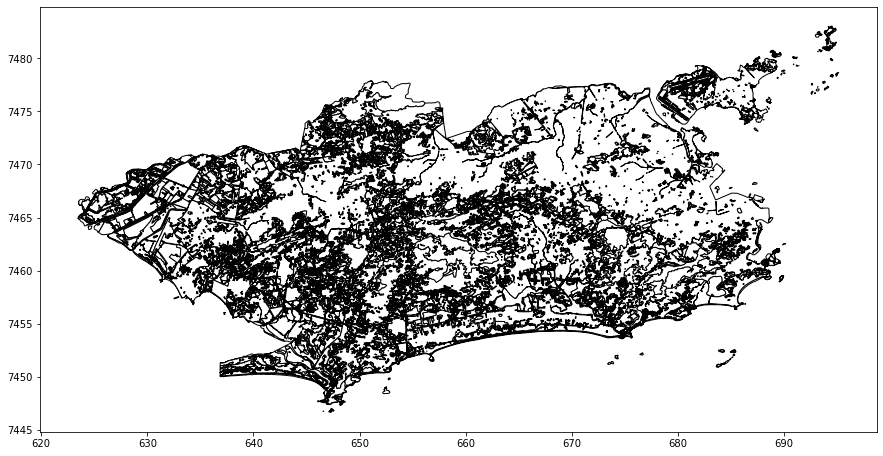

In [22]:
praias.plot(color='white', edgecolor='black', figsize=(15,8))

No mapa resultante, queremos identificar onde estão as praias. Para isso, utilizaremos a variável "legenda". Começaremos esse processo contando os elementos do conjunto a partir dessa variável:

In [23]:
praias['legenda'].value_counts()

Vegetação arbórea não florestal                                     3495
Vegetação gramíneo-lenhosa                                          2022
Floresta Ombrófila Densa, Estágio Inicial                            643
Áreas Urbanas                                                        639
Afloramento Rochoso                                                  474
Uso agrícola, Lavoura Permanente                                     445
Floresta Ombrófila Densa, Estágio Médio                              414
Corpos d’água continentais                                           388
Reflorestamento                                                      252
Formação Pioneira com influência flúvio-lacustre, Brejo herbáceo     210
Uso agrícola, Lavoura Temporária                                     164
Formação Pioneira com influência flúvio-marinha, Manguezal           161
Solo exposto                                                         152
Formação Pioneira com influência flúvio-marinha, Ca

Note que, dentre os diversos valores do conjunto, temos justamente o valor "Praia". A partir dele, sobrescreveremos nosso dataset, excluindo todos os valores restantes:

In [24]:
praias = praias[praias['legenda'] == 'Praia']

Em seguida, plotaremos esses dados sobre a base rj. Na base, utilizaremos a transparência (alpha=0.4) para tornar mais visíveis as áreas de nosso interesse:

<AxesSubplot:>

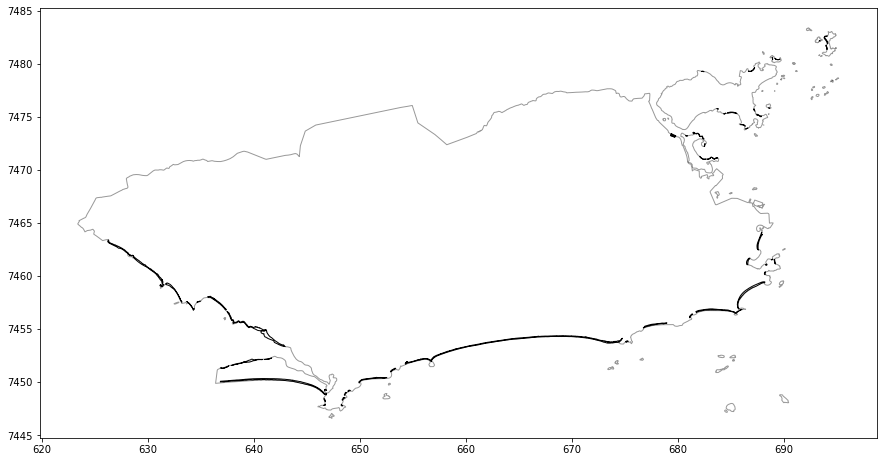

In [25]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8), alpha=0.4)
praias.plot(ax=base, color='white', edgecolor='black')

A ideia agora é calcularmos a distância dos pontos em geo_dados (os imóveis anunciados) até os polígonos que compõem o litoral da cidade, elencando as menores distâncias e salvando-as em uma nova variável/coluna Dist_Praia. O processo é exatamente o mesmo que fizemos nas aulas anteriores:

In [26]:
geo_dados['Dist_Praia'] = geo_dados['geometry'].apply(lambda x: praias.distance(x).min())

Se chamarmos geo_dados, teremos a nova coluna adicionada à tabela:

In [27]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_Praia
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),1.143453
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.478698
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),6.240694
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),3.404589
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),1.369015


Feito isso, podemos utilizar geo_dados.corr() para analisarmos os coeficientes de correlação do nosso conjunto:

In [28]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Praia
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.290745
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,0.560701
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.317743
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,-0.185829
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,-0.196554
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,-0.104570
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.361519
Dist_Praia,-0.290745,0.560701,-0.317743,-0.185829,-0.196554,-0.104570,-0.361519,1.000000


Repare que esse coeficiente, entre Dist_Praia e Valor, é de -0.361519. Novamente, e assim como esperávamos, temos um valor negativo - ou seja, quanto maior a distância entre o imóvel e a praia, menor é o seu valor. Além disso, esse número é maior que os coeficientes anteriores (Dist_Metro e Dist_Trans), o que aponta para uma influência maior na formação do valor.

Finalizando, vamos salvar as alterações com geo_dados.to_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp'), para que possamos utilizar essas informações no futuro em nosso modelo de regressão (ou até mesmo em outros projetos).

In [29]:
geo_dados.to_file('Mapas/RJ-DATASET/DATASET.shp')